# Python "científico": biblioteca _pandas_

![](images/sci_python_pandas.png)

_web site_: (`pandas.pydata.org`)

![](images/pandas_web.png)

## `Series`

> `Series` is a one-dimensional **labeled** array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the **index**. 

In [1]:
import pandas as pd

Uma Série (_Series_) é um conjunto (ordenado) de valores, mas cada valor é associado a uma "etiqueta" (_label_).

Ao conjunto das etiquetas dá-se o nome de "**índice**".

Quando construímos uma Série, usando a função `Series()`, podemos indicar o índice.

In [2]:
s = pd.Series([1.4, 2.2, 3.2, 6.5, 12],
              index=['a', 'b', 'c', 'd', 'e'])
print(s)

a     1.4
b     2.2
c     3.2
d     6.5
e    12.0
dtype: float64


Se não indicarmos um índice, o conjunto dos inteiros sucessivos será o índice.

In [3]:
s = pd.Series([1.4,2.2,3.2,6.5,12])
print(s)

0     1.4
1     2.2
2     3.2
3     6.5
4    12.0
dtype: float64


As Séries podem ser construídas a partir de um dicionário, em que as chaves são o índice.

In [4]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(d)
print(s)

a    0.0
b    1.0
c    2.0
dtype: float64


Podemos, mesmo neste caso, indicar um índice. Caso o índice tenha elementos para além das chaves do dicionário, haverá **valores em falta**.

In [5]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(d, index=['b', 'c', 'd', 'a'])
print(s)

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64


O uso do marcador `NaN` para indicar **valores em falta** e a existência de muitas funções de análise que levam em conta valores em falta são uma característica muito poderosa do módulo `pandas`.

### Funções descritivas dos valores

As Séries têm algumas funções de estatística descritiva de grande utilidade.

Note-se que, em geral, **os valores em falta são ignorados nos cálculos**.

In [6]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(d, index=['b', 'c', 'd', 'a'])
print(s)
print('\nMédia =', s.mean())

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

Média = 1.0


In [7]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(d, index=['b', 'c', 'd', 'a'])
print(s)
print('-----')
print(s.describe())

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64
-----
count    3.0
mean     1.0
std      1.0
min      0.0
25%      0.5
50%      1.0
75%      1.5
max      2.0
dtype: float64


In [8]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(d, index=['b', 'c', 'd', 'a'])
print(s.cumsum())

b    1.0
c    3.0
d    NaN
a    3.0
dtype: float64


In [9]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(d, index=['b', 'c', 'd', 'a'])

print(s.values)
print(s.index.values)

[  1.   2.  nan   0.]
['b' 'c' 'd' 'a']


### Indexação e operações vetoriais

As Séries podem ser usadas com indexação por números inteiros, comportando-se como uma lista ou um _array_ do `numpy`. 

A função `len()`também funciona com séries.

In [10]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(d, index=['b', 'c', 'd', 'a'])
print(len(s))
print(s[0])
print(s[-1])

4
1.0
0.0


As Séries podem ser usadas **como dicionários: as etiquetas comportam-se como chaves** e são usadas para indexar uma Série. para obter um valor (e também para modificar um valor).

Tal como nos dicionários, o operador `in` **testa a existência de uma etiqueta**.

In [11]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(d, index=['b', 'c', 'd', 'a'])
print(s)
print('-----------')
print(s['b'])
print(s.c) # notação abreviada
print('z' in s)
print('d' in s)

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64
-----------
1.0
2.0
False
True


Mas as Séries são muito mais poderosas: elas comportam-se como _arrays_ do módulo `numpy`. Podemos usar:

- _slices_
- **operações vetoriais**.

In [12]:
d = {'a' : 0.5, 'b' : 1.0, 'c' : 3.0, 'e': 1.8}
s = pd.Series(d, index=['b', 'c', 'd', 'e', 'a']) 
print(s)

print(s[:3])

b    1.0
c    3.0
d    NaN
e    1.8
a    0.5
dtype: float64
b    1.0
c    3.0
d    NaN
dtype: float64


In [13]:
d = {'a' : 0.5, 'b' : 1.0, 'c' : 3.0, 'e': 1.8}
s = pd.Series(d, index=['b', 'c', 'd', 'e', 'a']) 
print(s)

print(s**2)

b    1.0
c    3.0
d    NaN
e    1.8
a    0.5
dtype: float64
b    1.00
c    9.00
d     NaN
e    3.24
a    0.25
dtype: float64


In [14]:
d = {'a' : 0.5, 'b' : 1.0, 'c' : 3.0, 'e': 1.8}
s = pd.Series(d, index=['b', 'c', 'd', 'e', 'a']) 
print(s)

print(s[s > 1.1])

b    1.0
c    3.0
d    NaN
e    1.8
a    0.5
dtype: float64
c    3.0
e    1.8
dtype: float64


Também muito poderoso é o facto de que, quando aplicamos operações vetoriais sobre Séries (por exemplo, na soma de duas séries), **os valores são "alinhados" pelos respetivos _labels_** antes da operação. Vejamos estas duas séries:

In [15]:
s1 = pd.Series({'a' : 0.5, 'b' : 1.0, 'e': 1.8})
s2 = pd.Series({'a' : 0.5, 'b' : 1.0, 'f': 1.8})

print('Soma')
print(s1 + s2)

Soma
a    1.0
b    2.0
e    NaN
f    NaN
dtype: float64


A soma das duas Séries resulta numa Série em que todas as etiquetas estão presentes (**união de conjuntos**).

As que só existirem numa das Séries ou as que, numa das Séries, têm o valor `NaN`, terão o valor `NaN` no resultado final.

A função `.dropna()` permite eliminar os _valores em falta_.

In [16]:
s1 = pd.Series({'a' : 0.5, 'b' : 1.0, 'e': 1.8})
s2 = pd.Series({'a' : 0.5, 'b' : 1.0, 'f': 1.8})
s3 = s1 + s2

print(s3.dropna())

a    1.0
b    2.0
dtype: float64


## `DataFrame`

> `DataFrame` is a **2-dimensional labeled data structure** with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a **dict of Series objects**. It is generally the most commonly used pandas object.

Uma _DataFrame_ é um quadro bidimensional, em que cada coluna se comporta como uma Série, mas em que existe um índice comum a todas as colunas.

Para ilustar o uso de uma `DataFrame`, vamos ler e processar a informação da UniProt sobre a levedura _S. cerevisiae_.

A `DataFrame` terá as colunas "**ac**", "**rev**", "**n**" e "**sequence**"

In [17]:
def get_prots(filename):
    with open(filename) as big:
        tudo = big.read()
    return [p for p in tudo.split('//\n') if len(p) != 0]

prots = get_prots('uniprot_s_cerevisiae.txt')

def process_prot(p):
    linhas = p.split('\n')
    partes = linhas[0].split()
    reviewed = partes[2][0:-1]
    naa = int(partes[3])
    ac = linhas[1].split()[1][0:-1]
    for i in range(len(linhas)-1, 0, -1):
        if linhas[i].startswith('SQ'):
            break
    s = ''.join(linhas[i+1:])
    seq = ''.join(s.split())
    return {'ac':ac, 'rev':reviewed, 'n':naa, 'seq':seq}

pinfo = [process_prot(p) for p in prots]
print('Numero total de proteínas: {}'.format(len(pinfo)))
print('A primeira proteína tem', pinfo[0]['n'], 'aminoácidos')

Numero total de proteínas: 6816
A primeira proteína tem 316 aminoácidos


Podemos construir uma `DataFrame` a partir de uma lista de dicionários. As **chaves dos dicionários serão as colunas**.

In [18]:
prots = pd.DataFrame(pinfo)
print(len(prots))
prots[:3]

6816


,ac,n,rev,seq
0,P29703,316,Reviewed,MEEYDYSDVKPLPIETDLQDELCRIMYTEDYKRLMGLARALISLNE...
1,P36001,430,Reviewed,MDDISGRQTLPRINRLLEHVGNPQDSLSILHIAGTNGKETVSKFLT...
2,P08524,352,Reviewed,MASEKEIRRERFLNVFPKLVEELNASLLAYGMPKEACDWYAHSLNY...


Para inspeção rápida, as funções `.head()` e `.tail()` apresentam o início e o fim da `DataFrame`

In [19]:
prots = pd.DataFrame(pinfo)
#prots.head()
prots.tail()

,ac,n,rev,seq
6811,A0A1S0T058,133,Unreviewed,MSETCSSSLALLHKILHIHSHTPSVYYNICISVRILTSERLQCFFF...
6812,A0A1S0T090,108,Unreviewed,MYKVSACGVRIMSGISEIWIGELRDYKYALRLDREEYPAVLVYEYD...
6813,A0A1S0T072,145,Unreviewed,MAILLPLKSILPWCCITFSFLLSSSGSISHSTASSSITLTKSSKPT...
6814,A0A1S0T069,239,Unreviewed,MMPTYLGKLTWSYFFTTLGLACAYNVTEQMEFDQFKSDYLACLAPE...
6815,A0A1S0T004,163,Unreviewed,MEMHWITLVAFIATFFNLAATSINNSSLPDVDLTNPLRFFTNIPAG...


Podemos mudar o índice para uma das colunas.

In [20]:
prots = prots.set_index('ac')
prots.head()

,n,rev,seq
ac,,,
P29703,316,Reviewed,MEEYDYSDVKPLPIETDLQDELCRIMYTEDYKRLMGLARALISLNE...
P36001,430,Reviewed,MDDISGRQTLPRINRLLEHVGNPQDSLSILHIAGTNGKETVSKFLT...
P08524,352,Reviewed,MASEKEIRRERFLNVFPKLVEELNASLLAYGMPKEACDWYAHSLNY...
P28003,413,Reviewed,MGLYSPESEKSQLNMNYIGKDDSQSIFRRLNQNLKASNNNNDSNKN...
Q99341,161,Reviewed,MSLYQSIVFIARNVVNSITRILHDHPTNSSLITQTYFITPNHSGKN...


A indexação com o nome de uma coluna devolve essa coluna (mas associada ao índice).

Cada coluna comporta-se como uma Série.

In [21]:
prots['n']

ac
P29703         316
P36001         430
P08524         352
P28003         413
Q99341         161
P53913         173
P38297         855
P39012         614
P22146         559
P38631        1876
P43557         207
P53233         369
Q12676         427
P32614         470
P32791         686
P38310         465
P18852         110
P42837         879
Q08967         793
P23900         669
Q05015         223
P11710         512
Q08559         129
P36033         711
Q12473         712
Q12209         686
Q12029         327
P32805         299
P36170        1169
P39712        1322
              ... 
A0A1S0T076     103
A0A1S0T0A7     110
A0A1S0T0B4     122
A0A1S0T0A4     124
A0A1S0T0C1     109
A0A1S0T0A9     120
A0A1S0T066     135
A0A1S0T088     113
A0A1S0T045     103
A0A1S0T073     164
A0A1S0T062     147
A0A1S0SZZ3     104
A0A1S0SZN9     130
A0A1S0T0D1     108
A0A1S0T0A0     125
A0A1S0T093     113
A0A1S0SZW7     133
A0A1S0T0B3     101
A0A1S0T034     149
A0A1S0T0B0     113
A0A1S0T059     101
A0A1S0T0A

In [22]:
print(prots['n']['P31383'])
print(prots['n'].max())
print(prots['n'].min())
print(prots['n'].mean())

635
4910
16
445.49838615023475


In [23]:
print(prots['n'].describe())

count    6816.000000
mean      445.498386
std       380.358091
min        16.000000
25%       169.000000
50%       352.000000
75%       585.000000
max      4910.000000
Name: n, dtype: float64


In [24]:
desc = prots['n'].describe()
min_aa = desc['min']
max_aa = desc['max']

print('Menor proteína:', min_aa)
print('Maior proteína:', max_aa)

Menor proteína: 16.0
Maior proteína: 4910.0


Quais são as proteínas menores e maiores?

In [25]:
min_aa = prots['n'].describe()['min']

prots[prots['n'] == min_aa]

,n,rev,seq
ac,,,
Q3E775,16,Reviewed,MLSLIFYLRFPSYIRG


In [26]:
max_aa = prots['n'].describe()['max']

prots[prots['n'] == max_aa]

,n,rev,seq
ac,,,
Q12019,4910,Reviewed,MSQDRILLDLDVVNQRLILFNSAFPSDAIEAPFHFSNKESTSENLD...


Para obter uma linha usamos `.loc` e indexação por um _label_.

A linha obtida é uma _Series_.

In [27]:
prots.loc['P31383']

n                                                    635
rev                                             Reviewed
seq    MSGARSTTAGAVPSAATTSTTSTTSNSKDSDSNESLYPLALLMDEL...
Name: P31383, dtype: object

Quantos triptofanos tem a proteína P31383?

In [28]:
prots.loc['P31383']['seq'].count('W')

7

A indexação com condições sobre as colunas é muito poderosa.

Qauntas proteínas têm mais de 2000 aminoácidos?

In [29]:
bigs = prots[prots['n'] > 2000]
print(len(bigs))
bigs

37


,n,rev,seq
ac,,,
Q06179,2628,Reviewed,MMFPINVLLYKWLIFAVTFLWSCKILLRKLLGINITWINLFKLEIC...
P33892,2672,Reviewed,MTAILNWEDISPVLEKGTRESHVSKRVPFLQDISQLVRQETLEKPQ...
Q12680,2145,Reviewed,MPVLKSDNFDPLEEAYEGGTIQNYNDEHHLHKSWANVIPDKRGLYD...
P32874,2273,Reviewed,KGKTITHGQSWGARRIHSHFYITIFTITCIRIGQYKLALYLDPYRF...
P19158,3079,Reviewed,MSQPTKNKKKEHGTDSKSSRMTRTLVNHILFERILPILPVESNLST...
P39526,2014,Reviewed,MANRSLKKVIETSSNNGHDLLTWITTNLEKLICLKEVNDNEIQEVK...
P18963,3092,Reviewed,MNQSDPQDKKNFPMEYSLTKHLFFDRLLLVLPIESNLKTYADVEAD...
Q12019,4910,Reviewed,MSQDRILLDLDVVNQRLILFNSAFPSDAIEAPFHFSNKESTSENLD...
P25655,2108,Reviewed,MLSATYRDLNTASNLETSKEKQAAQIVIAQISLLFTTLNNDNFESV...


In [30]:
# Média dos comprimentos das proteínas
# com mais de 2000 aminoácidos
prots[prots['n'] > 2000]['n'].mean()

2564.4054054054054

De novo, qual a proteína maior?

In [31]:
prots['n'].idxmax()

'Q12019'

In [32]:
prots.loc[prots['n'].idxmax()]

n                                                   4910
rev                                             Reviewed
seq    MSQDRILLDLDVVNQRLILFNSAFPSDAIEAPFHFSNKESTSENLD...
Name: Q12019, dtype: object

Para aplicar funções de _strings_ a toda uma coluna de uma só vez, usamos o atributo `.str.` sobre essa coluna (o resultado é uma Série):

In [33]:
prots['seq'].str.count('W')

ac
P29703        11
P36001         5
P08524         4
P28003         5
Q99341         0
P53913         0
P38297         5
P39012        15
P22146         5
P38631        37
P43557         1
P53233         7
Q12676         4
P32614         2
P32791        16
P38310         7
P18852         1
P42837        14
Q08967        14
P23900        10
Q05015         2
P11710         7
Q08559         1
P36033        11
Q12473        15
Q12209        11
Q12029         4
P32805         3
P36170         9
P39712        20
              ..
A0A1S0T076     1
A0A1S0T0A7     0
A0A1S0T0B4     2
A0A1S0T0A4     0
A0A1S0T0C1     0
A0A1S0T0A9     2
A0A1S0T066     1
A0A1S0T088     1
A0A1S0T045     0
A0A1S0T073     4
A0A1S0T062     4
A0A1S0SZZ3     2
A0A1S0SZN9     0
A0A1S0T0D1     2
A0A1S0T0A0     2
A0A1S0T093     3
A0A1S0SZW7     1
A0A1S0T0B3     0
A0A1S0T034     2
A0A1S0T0B0     1
A0A1S0T059     1
A0A1S0T0A8     0
A0A1S0T086     6
A0A1S0T0B6     3
A0A1S0T065     0
A0A1S0T058     0
A0A1S0T090     2
A0A1S0T072 

Com uma indexação por nome, podemos inserir uma coluna nova na `DataFrame` (no fim).

In [34]:
prots['W'] = prots['seq'].str.count('W')
prots.head()

,n,rev,seq,W
ac,,,,
P29703,316,Reviewed,MEEYDYSDVKPLPIETDLQDELCRIMYTEDYKRLMGLARALISLNE...,11
P36001,430,Reviewed,MDDISGRQTLPRINRLLEHVGNPQDSLSILHIAGTNGKETVSKFLT...,5
P08524,352,Reviewed,MASEKEIRRERFLNVFPKLVEELNASLLAYGMPKEACDWYAHSLNY...,4
P28003,413,Reviewed,MGLYSPESEKSQLNMNYIGKDDSQSIFRRLNQNLKASNNNNDSNKN...,5
Q99341,161,Reviewed,MSLYQSIVFIARNVVNSITRILHDHPTNSSLITQTYFITPNHSGKN...,0


As `DataFrame`s também têm funções descritivas, mas o facto de cada coluna ser uma Série podemos realizar muitas análises de uma forma simples.

In [35]:
prots.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6816 entries, P29703 to A0A1S0T004
Data columns (total 4 columns):
n      6816 non-null int64
rev    6816 non-null object
seq    6816 non-null object
W      6816 non-null int64
dtypes: int64(2), object(2)
memory usage: 266.2+ KB


In [36]:
print(prots['rev'].value_counts())

Reviewed      6721
Unreviewed      95
Name: rev, dtype: int64


In [37]:
# só no IPython/Jupyter notebook
%matplotlib inline

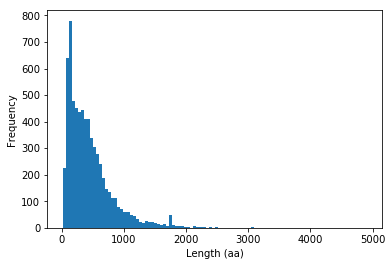

In [38]:
import matplotlib.pyplot as pl
pl.ylabel('Proteins')
pl.xlabel('Length (aa)')
p = prots['n'].plot(kind='hist', bins=100)